In [1]:
#important libraries
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [39]:
#fetching one year dataset of S&P 500 from yahoo finance site(april 2017 to march 2018)
d = pd.read_csv("^GSPC-5.csv")

In [3]:
d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2549.128430,2557.889877,2539.520000,2549.010886,2549.010886,3.472336e+09
std,137.160516,140.311128,134.142703,136.665183,136.665183,5.940791e+08
min,2332.620117,2348.260010,2328.949951,2328.949951,2328.949951,1.349780e+09
25%,2434.924926,2441.772583,2428.427551,2435.732605,2435.732605,3.175318e+09
50%,2508.559936,2515.594971,2505.589966,2514.710083,2514.710083,3.416455e+09
75%,2661.454956,2678.417419,2646.515075,2662.135071,2662.135071,3.709695e+09
max,2867.229980,2872.870117,2851.479980,2872.870117,2872.870117,5.891660e+09


In [7]:
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000


In [8]:
#Using Different Indicators
#1. Simple moving Average(SMA)
def SMA(df, base, target, period):
    """
    Function to compute Simple Moving Average (SMA)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the SMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
        
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """

    df[target] = df[base].rolling(window=period).mean()
    df[target].fillna(0, inplace=True)

    return df

In [40]:
SMA(d,'Close','sma_50',50)

,Date,Open,High,Low,Close,Adj Close,Volume,sma_50
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,0.000000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,0.000000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,0.000000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,0.000000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,0.000000
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,0.000000
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,0.000000
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,0.000000
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,0.000000
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,0.000000


In [41]:
SMA(d,'Close','sma_100',100)

,Date,Open,High,Low,Close,Adj Close,Volume,sma_50,sma_100
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,0.000000,0.000000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,0.000000,0.000000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,0.000000,0.000000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,0.000000,0.000000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,0.000000,0.000000
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,0.000000,0.000000
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,0.000000,0.000000
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,0.000000,0.000000
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,0.000000,0.000000
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,0.000000,0.000000


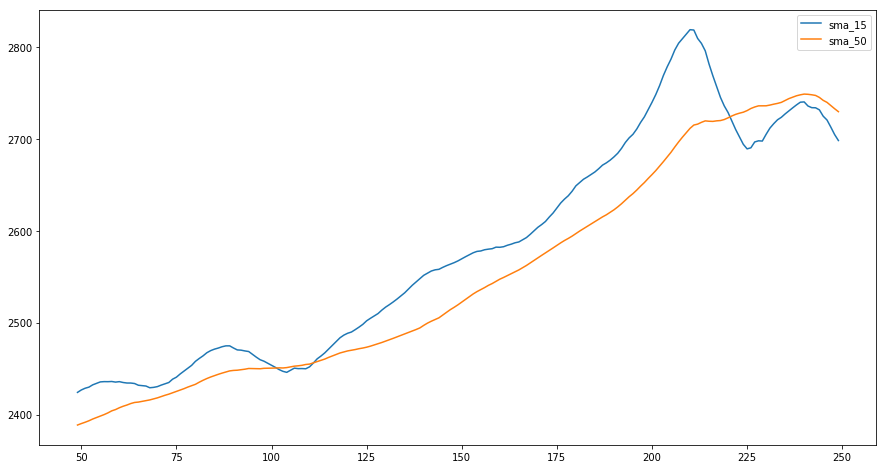

In [24]:
d['sma_15'].plot(legend=True, figsize=(15,8))
d['sma_50'].plot(legend=True, figsize=(15,8))

In [10]:
# 2. Exponential moving averaeg(EMA)
def EMA(df, base, target, period, alpha=False):
    """
    Function to compute Exponential Moving Average (EMA)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        base : String indicating the column name from which the EMA needs to be computed from
        target : String indicates the column name to which the computed data needs to be stored
        period : Integer indicates the period of computation in terms of number of candles
        alpha : Boolean if True indicates to use the formula for computing EMA using alpha (default is False)
        
    Returns :
        df : Pandas DataFrame with new column added with name 'target'
    """

    con = pd.concat([df[:period][base].rolling(window=period).mean(), df[period:][base]])
    
    if (alpha == True):
        # (1 - alpha) * previous_val + alpha * current_val where alpha = 1 / period
        df[target] = con.ewm(alpha=1 / period, adjust=False).mean()
    else:
        # ((current_val - previous_val) * coeff) + previous_val where coeff = 2 / (period + 1)
        df[target] = con.ewm(span=period, adjust=False).mean()
    
    df[target].fillna(0, inplace=True)
    return df

In [42]:
EMA(d,'Close','ema_10',10,True)

,Date,Open,High,Low,Close,Adj Close,Volume,sma_50,sma_100,ema_10
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,0.000000,0.000000,0.000000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,0.000000,0.000000,0.000000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,0.000000,0.000000,0.000000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,0.000000,0.000000,0.000000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,0.000000,0.000000,0.000000
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,0.000000,0.000000,0.000000
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,0.000000,0.000000,0.000000
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,0.000000,0.000000,0.000000
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,0.000000,0.000000,0.000000
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,0.000000,0.000000,2351.880981


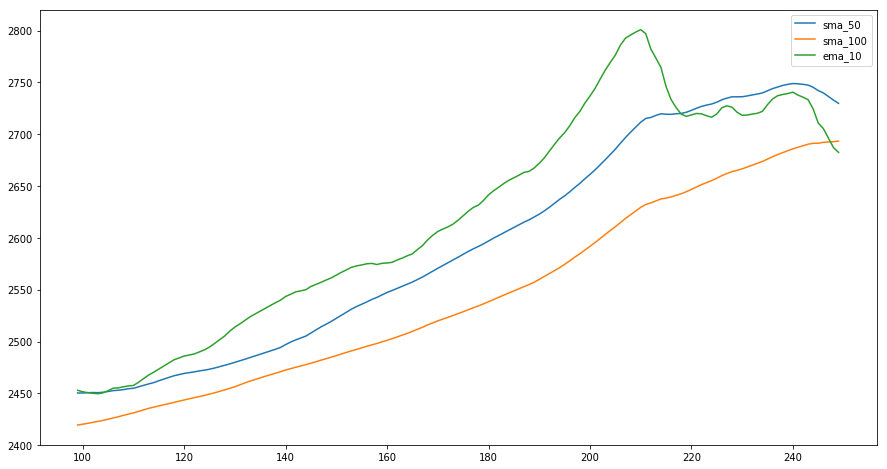

In [43]:
d=d.loc[99:]
d['sma_50'].plot(legend=True, figsize=(15,8))
d['sma_100'].plot(legend=True, figsize=(15,8))
d['ema_10'].plot(legend=True, figsize=(15,8))

In [44]:
#refetching dataset
df = pd.read_csv("^GSPC-5.csv")

In [45]:
# 3.Moving Average Convergence Divergence(MACD)
def MACD(df, fastEMA=12, slowEMA=26, signal=9, base='Close'):
    """
    Function to compute Moving Average Convergence Divergence (MACD)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        fastEMA : Integer indicates faster EMA
        slowEMA : Integer indicates slower EMA
        signal : Integer indicates the signal generator for MACD
        base : String indicating the column name from which the MACD needs to be computed from (Default Close)
        
    Returns :
        df : Pandas DataFrame with new columns added for 
            Fast EMA (ema_$fastEMA)
            Slow EMA (ema_$slowEMA)
            MACD (macd_$fastEMA_$slowEMA_$signal)
            MACD Signal (signal_$fastEMA_$slowEMA_$signal)
            MACD Histogram (MACD (hist_$fastEMA_$slowEMA_$signal)) 
    """

    fE = "ema_" + str(fastEMA)
    sE = "ema_" + str(slowEMA)
    macd = "macd_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)
    sig = "signal_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)
    hist = "hist_" + str(fastEMA) + "_" + str(slowEMA) + "_" + str(signal)

    # Compute fast and slow EMA    
    EMA(df, base, fE, fastEMA)
    EMA(df, base, sE, slowEMA)
    
    # Compute MACD
    df[macd] = np.where(np.logical_and(np.logical_not(df[fE] == 0), np.logical_not(df[sE] == 0)), df[fE] - df[sE], 0)
    
    # Compute MACD Signal
    EMA(df, macd, sig, signal)
    
    # Compute MACD Histogram
    df[hist] = np.where(np.logical_and(np.logical_not(df[macd] == 0), np.logical_not(df[sig] == 0)), df[macd] - df[sig], 0)
    
    return df



In [46]:
MACD(df)

,Date,Open,High,Low,Close,Adj Close,Volume,ema_12,ema_26,macd_12_26_9,signal_12_26_9,hist_12_26_9
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,0.000000,0.000000,0.000000,0.000000,0.000000


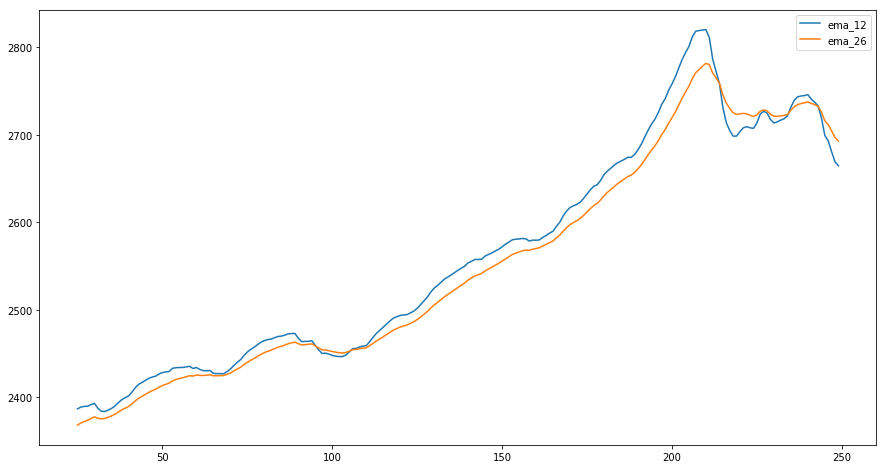

In [47]:
df=df[25:]
df['ema_12'].plot(legend=True, figsize=(15,8))
df['ema_26'].plot(legend=True, figsize=(15,8))

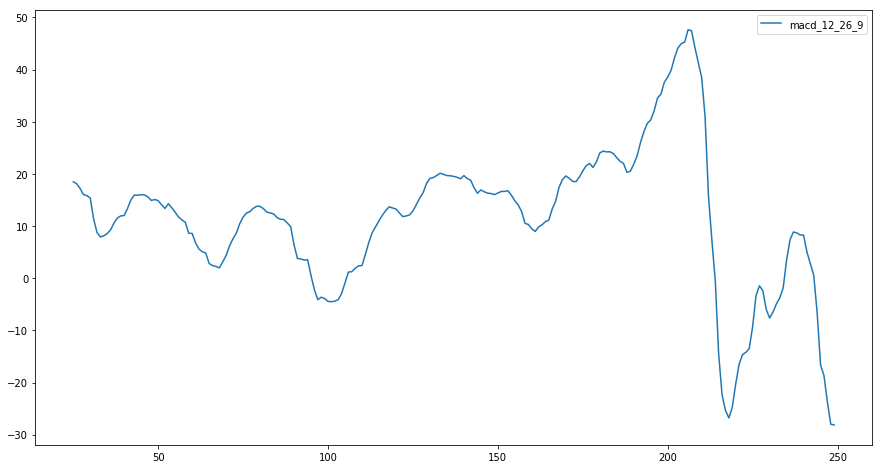

In [48]:
df['macd_12_26_9'].plot(legend=True, figsize=(15,8))

In [52]:
#refetching dataset
df2 = pd.read_csv("^GSPC-5.csv")

In [57]:
df3 = pd.read_csv("^GSPC-5.csv")

In [49]:
# 4. Average True Range

def ATR(df, period, ohlc=['Open', 'High', 'Low', 'Close']):
    """
    Function to compute Average True Range (ATR)
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        period : Integer indicates the period of computation in terms of number of candles
        ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])
        
    Returns :
        df : Pandas DataFrame with new columns added for 
            True Range (TR)
            ATR (ATR_$period)
    """
    atr = 'ATR_' + str(period)

    # Compute true range only if it is not computed and stored earlier in the df
    if not 'TR' in df.columns:
        df['h-l'] = df[ohlc[1]] - df[ohlc[2]]
        df['h-yc'] = abs(df[ohlc[1]] - df[ohlc[3]].shift())
        df['l-yc'] = abs(df[ohlc[2]] - df[ohlc[3]].shift())
         
        df['TR'] = df[['h-l', 'h-yc', 'l-yc']].max(axis=1)
         
        df.drop(['h-l', 'h-yc', 'l-yc'], inplace=True, axis=1)

    # Compute EMA of true range using ATR formula after ignoring first row
    EMA(df, 'TR', atr, period, alpha=True)
    
    return df

In [58]:
'''
50-June 2017
100-august-september
150-november
200-january-february 2018
250-march
'''
ATR(df3,20)

,Date,Open,High,Low,Close,Adj Close,Volume,TR,ATR_20
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,21.140137,0.000000
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,9.810058,0.000000
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,27.840087,0.000000
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,15.260010,0.000000
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,13.020020,0.000000
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,14.870117,0.000000
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,19.909912,0.000000
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,12.600097,0.000000
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,19.310059,0.000000
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,20.189942,0.000000


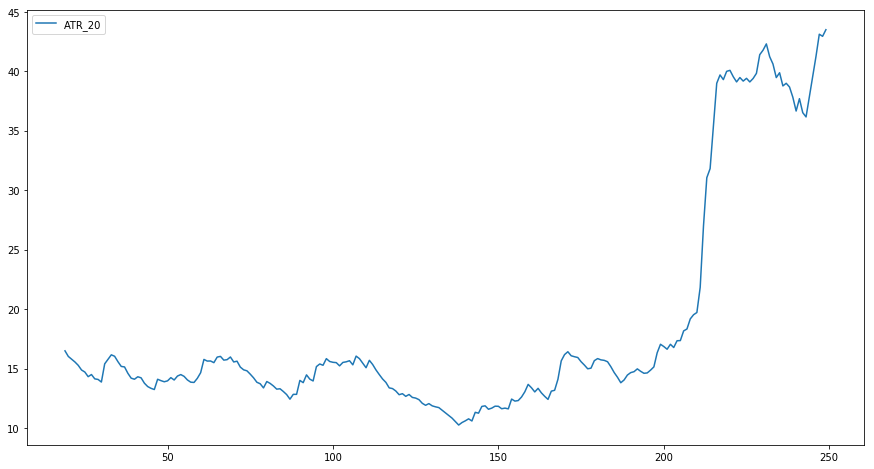

In [60]:
df3=df3.loc[19:]
df3['ATR_20'].plot(legend=True, figsize=(15,8))

In [50]:
# 5. Super Trend
'''
Supertrend is a very simple indicator. The Buy and Sell signal changes as soon 
as the indicator flips over the closing price (see image below). When the Supertrend 
closes below the Price, a Buy signal is generated, and when the Supertrend closes above
the Price, a Sell signal is generated

'''


def SuperTrend(df, period, multiplier, ohlc=['Open', 'High', 'Low', 'Close']):
    """
    Function to compute SuperTrend
    
    Args :
        df : Pandas DataFrame which contains ['date', 'open', 'high', 'low', 'close', 'volume'] columns
        period : Integer indicates the period of computation in terms of number of candles
        multiplier : Integer indicates value to multiply the ATR
        ohlc: List defining OHLC Column names (default ['Open', 'High', 'Low', 'Close'])
        
    Returns :
        df : Pandas DataFrame with new columns added for 
            True Range (TR), ATR (ATR_$period)
            SuperTrend (ST_$period_$multiplier)
            SuperTrend Direction (STX_$period_$multiplier)
    """

    ATR(df, period, ohlc=ohlc)
    atr = 'ATR_' + str(period)
    st = 'ST_' + str(period) + '_' + str(multiplier)
    stx = 'STX_' + str(period) + '_' + str(multiplier)
    
    """
    SuperTrend Algorithm :
    
        BASIC UPPERBAND = (HIGH + LOW) / 2 + Multiplier * ATR
        BASIC LOWERBAND = (HIGH + LOW) / 2 - Multiplier * ATR
        
        FINAL UPPERBAND = IF( (Current BASICUPPERBAND < Previous FINAL UPPERBAND) or (Previous Close > Previous FINAL UPPERBAND))
                            THEN (Current BASIC UPPERBAND) ELSE Previous FINALUPPERBAND)
        FINAL LOWERBAND = IF( (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) or (Previous Close < Previous FINAL LOWERBAND)) 
                            THEN (Current BASIC LOWERBAND) ELSE Previous FINAL LOWERBAND)
        
        SUPERTREND = IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close <= Current FINAL UPPERBAND)) THEN
                        Current FINAL UPPERBAND
                    ELSE
                        IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close > Current FINAL UPPERBAND)) THEN
                            Current FINAL LOWERBAND
                        ELSE
                            IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close >= Current FINAL LOWERBAND)) THEN
                                Current FINAL LOWERBAND
                            ELSE
                                IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close < Current FINAL LOWERBAND)) THEN
                                    Current FINAL UPPERBAND
    """
    
    # Compute basic upper and lower bands
    df['basic_ub'] = (df[ohlc[1]] + df[ohlc[2]]) / 2 + multiplier * df[atr]
    df['basic_lb'] = (df[ohlc[1]] + df[ohlc[2]]) / 2 - multiplier * df[atr]

    # Compute final upper and lower bands
    df['final_ub'] = 0.00
    df['final_lb'] = 0.00
    for i in range(period, len(df)):
        df['final_ub'].iat[i] = df['basic_ub'].iat[i] if df['basic_ub'].iat[i] < df['final_ub'].iat[i - 1] or df['Close'].iat[i - 1] > df['final_ub'].iat[i - 1] else df['final_ub'].iat[i - 1]
        df['final_lb'].iat[i] = df['basic_lb'].iat[i] if df['basic_lb'].iat[i] > df['final_lb'].iat[i - 1] or df['Close'].iat[i - 1] < df['final_lb'].iat[i - 1] else df['final_lb'].iat[i - 1]
       
    # Set the Supertrend value
    df[st] = 0.00
    for i in range(period, len(df)):
        df[st].iat[i] = df['final_ub'].iat[i] if df[st].iat[i - 1] == df['final_ub'].iat[i - 1] and df['Close'].iat[i] <= df['final_ub'].iat[i] else \
                        df['final_lb'].iat[i] if df[st].iat[i - 1] == df['final_ub'].iat[i - 1] and df['Close'].iat[i] >  df['final_ub'].iat[i] else \
                        df['final_lb'].iat[i] if df[st].iat[i - 1] == df['final_lb'].iat[i - 1] and df['Close'].iat[i] >= df['final_lb'].iat[i] else \
                        df['final_ub'].iat[i] if df[st].iat[i - 1] == df['final_lb'].iat[i - 1] and df['Close'].iat[i] <  df['final_lb'].iat[i] else 0.00 
                 
    # Mark the trend direction up/down
    df[stx] = np.where((df[st] > 0.00), np.where((df[ohlc[3]] < df[st]), 'down',  'up'), np.NaN)

    # Remove basic and final bands from the columns
    df.drop(['basic_ub', 'basic_lb', 'final_ub', 'final_lb'], inplace=True, axis=1)
    
    df.fillna(0, inplace=True)

    return df



In [53]:
SuperTrend(df2,20,2)

,Date,Open,High,Low,Close,Adj Close,Volume,TR,ATR_20,ST_20_2,STX_20_2
0,2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000,21.140137,0.000000,0.000000,nan
1,2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000,9.810058,0.000000,0.000000,nan
2,2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000,27.840087,0.000000,0.000000,nan
3,2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000,15.260010,0.000000,0.000000,nan
4,2017-04-07,2356.590088,2363.760010,2350.739990,2355.540039,2355.540039,3053150000,13.020020,0.000000,0.000000,nan
5,2017-04-10,2357.159912,2366.370117,2351.500000,2357.159912,2357.159912,2785410000,14.870117,0.000000,0.000000,nan
6,2017-04-11,2353.919922,2355.219971,2337.250000,2353.780029,2353.780029,3117420000,19.909912,0.000000,0.000000,nan
7,2017-04-12,2352.149902,2352.719971,2341.179932,2344.929932,2344.929932,3196950000,12.600097,0.000000,0.000000,nan
8,2017-04-13,2341.979980,2348.260010,2328.949951,2328.949951,2328.949951,3143890000,19.310059,0.000000,0.000000,nan
9,2017-04-17,2332.620117,2349.139893,2332.510010,2349.010010,2349.010010,2824710000,20.189942,0.000000,0.000000,nan


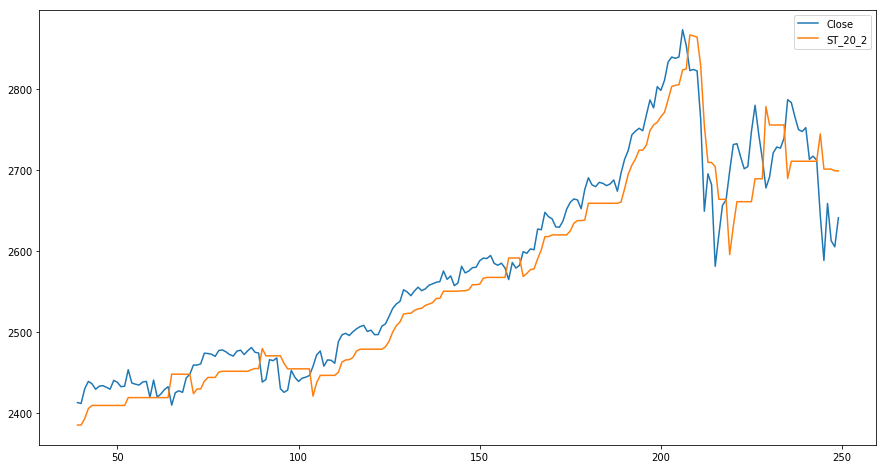

In [56]:
df2=df2[20:]
df2['Close'].plot(legend=True, figsize=(15,8))
df2['ST_20_2'].plot(legend=True, figsize=(15,8))
